# Strings패키지 공부
### 출처 : http://www.di.fc.ul.pt/~jpn/r/
---

# Standard functions
- paste : pastes vectors together
- substr : extract/replace substrings in a character vector
- substring : expand cyclically several results
- strsplit : split the elements into substrings according to the matches(uses regular expressions)
---

In [3]:
# date()를 통해 현지 시간 출력
paste("Today is ", date())

[1] "Today is  Mon Sep 04 16:22:23 2017"

In [5]:
# paste0 : 문자 사이에 공백 없이 출력
xs <- 1:7
paste0("A", xs)

[1] "A1" "A2" "A3" "A4" "A5" "A6" "A7"

In [6]:
paste("A", xs, sep = ",")

[1] "A,1" "A,2" "A,3" "A,4" "A,5" "A,6" "A,7"

In [13]:
letters[1:10] # 소문자 알파벳 출력
paste(letters[1:10], xs, sep = "|")

[1] "a" "b" "c" "d" "e" "f" "g" "h" "i" "j"

[1] "a|1" "b|2" "c|3" "d|4" "e|5" "f|6" "g|7" "h|1" "i|2" "j|3"

In [16]:
paste(letters[1:10], xs, sep = "|", collapse = ",")

[1] "a|1,b|2,c|3,d|4,e|5,f|6,g|7,h|1,i|2,j|3"

In [34]:
cs <- "o mapa nao e o territorio"
paste0(cs,", tem ", nchar(cs), "characteres")

[1] "o mapa nao e o territorio, tem 25characteres"

In [35]:
# start, end로 문자 뽑아내기
substr(cs, 3, 6)

[1] "mapa"

In [36]:
# 해당 위치 문자 변환
substr(cs, 3, 6) <- "MAPA"
cs

[1] "o MAPA nao e o territorio"

In [42]:
# substr은 결과가 1개 뿐이지만
# substring은 여러개 결과 출력
substring(cs, 2, 4:6)

[1] " MA"   " MAP"  " MAPA"

In [48]:
# strsplit(데이터, 패턴)
# o와 a를 기준으로 문자열을 분리
cs <- "o mapa nao e o territorio"
strsplit(cs,"[oa]")

[[1]]
[1] ""        " m"      "p"       " n"      ""        " e "     " territ"
[8] "ri"

In [45]:
cs <- paste(letters[1:10],1:7,sep="|",collapse=",")
cs

[1] "a|1,b|2,c|3,d|4,e|5,f|6,g|7,h|1,i|2,j|3"

In [47]:
# ,와 |을 기준으로 문자열을 분리
cs1 <- strsplit(cs,"[,|]")[[1]]
cs1

[1] "a" "1" "b" "2" "c" "3" "d" "4" "e" "5" "f" "6" "g" "7" "h" "1" "i" "2" "j"
[20] "3"

In [49]:
cs1 <- paste0(cs1,collapse="")
cs1

[1] "a1b2c3d4e5f6g7h1i2j3"

# Regular Expressions(정규표현식)
---

In [52]:
# 숫자를 기준으로 문자열을 분리
strsplit(cs1,"[1-9]")

[[1]]
 [1] "a" "b" "c" "d" "e" "f" "g" "h" "i" "j"

In [56]:
# . : 어떠한 문자든 출력 a.b.c.d의 길이 만큼
strsplit("a.b.c.d", ".") 
# .d : .d로 끝나는 문자 출력
strsplit("a.b.c.d", ".d")

[[1]]
[1] "" "" "" "" "" "" ""

[[1]]
[1] "a.b.c"

In [67]:
# .을 이용해서 문자를 분리하려면 \\(escape)사용
strsplit("a.b.c", "\\.")

[[1]]
[1] "a" "b" "c"

In [59]:
cs <- c("aaa","abb","ccc","dda","eaa")

In [66]:
# sub : 패턴이 처음 매칭되는 문자 변경
sub("a", "X", cs) 

[1] "Xaa" "Xbb" "ccc" "ddX" "eXa"

In [65]:
# gsub : 패턴이 매칭되는 모든 문자 변경
gsub("a", "X", cs) 

[1] "XXX" "Xbb" "ccc" "ddX" "eXX"

In [69]:
text.test <- "Evidence for a model (or belief) must be considered against alternative models. Let me describe a neutral (and very simple) example: Assume I say I have Extra Sensorial Perception (ESP) and tell you that the next dice throw will be 1. You throw the dice and I was right. That is evidence for my claim of ESP. However there's an alternative model ('just a lucky guess') that also explains it and it's much more likely to be the right model (because ESP needs much more assumptions, many of those in conflict with accepted facts and theories). This is a subject of statistical inference. It's crucial to consider the alternatives when we want to put our beliefs to the test."
text.test

[1] "Evidence for a model (or belief) must be considered against alternative models. Let me describe a neutral (and very simple) example: Assume I say I have Extra Sensorial Perception (ESP) and tell you that the next dice throw will be 1. You throw the dice and I was right. That is evidence for my claim of ESP. However there's an alternative model ('just a lucky guess') that also explains it and it's much more likely to be the right model (because ESP needs much more assumptions, many of those in conflict with accepted facts and theories). This is a subject of statistical inference. It's crucial to consider the alternatives when we want to put our beliefs to the test."

In [70]:
# belief 또는 model 이라는 문자를 XXX로 변경
gsub("belief|model","XXX",text.test) 

[1] "Evidence for a XXX (or XXX) must be considered against alternative XXXs. Let me describe a neutral (and very simple) example: Assume I say I have Extra Sensorial Perception (ESP) and tell you that the next dice throw will be 1. You throw the dice and I was right. That is evidence for my claim of ESP. However there's an alternative XXX ('just a lucky guess') that also explains it and it's much more likely to be the right XXX (because ESP needs much more assumptions, many of those in conflict with accepted facts and theories). This is a subject of statistical inference. It's crucial to consider the alternatives when we want to put our XXXs to the test."

In [72]:
# t ~~ ?t : t로 둘러쌓여있는 문자중에서
# [a-z]* : 0번 이상 나온 모든 문자들 XXX로 변경
gsub("t([a-z]*)?t","XXX",text.test)

[1] "Evidence for a model (or belief) must be considered against alXXXive models. Let me describe a neutral (and very simple) example: Assume I say I have Extra Sensorial Perception (ESP) and tell you XXX the next dice throw will be 1. You throw the dice and I was right. That is evidence for my claim of ESP. However there's an alXXXive model ('just a lucky guess') XXX also explains it and it's much more likely to be the right model (because ESP needs much more assumptions, many of those in conflict with accepted facts and theories). This is a subject of sXXXical inference. It's crucial to consider the alXXXives when we want to put our beliefs to the XXX."

- [a-z]+ : [a-z]가 적어도 한번 이상
- [a-z]*  : [a-z]가 0번 이상
- [a-z]? : [a-z]가 0 or 1번

In [76]:
# 반복 문자 지우기
# [a-z]가 2번 반복된 경우 
# ex) ee, ss
gsub("([a-z])\\1","YY",text.test) 

[1] "Evidence for a model (or belief) must be considered against alternative models. Let me describe a neutral (and very simple) example: AYYume I say I have Extra Sensorial Perception (ESP) and teYY you that the next dice throw wiYY be 1. You throw the dice and I was right. That is evidence for my claim of ESP. However there's an alternative model ('just a lucky gueYY') that also explains it and it's much more likely to be the right model (because ESP nYYds much more aYYumptions, many of those in conflict with aYYepted facts and theories). This is a subject of statistical inference. It's crucial to consider the alternatives when we want to put our beliefs to the test."

In [77]:
# model이라는 문자의 좌우에 * 추가
gsub("(model)","*\\1*",text.test) 

[1] "Evidence for a *model* (or belief) must be considered against alternative *model*s. Let me describe a neutral (and very simple) example: Assume I say I have Extra Sensorial Perception (ESP) and tell you that the next dice throw will be 1. You throw the dice and I was right. That is evidence for my claim of ESP. However there's an alternative *model* ('just a lucky guess') that also explains it and it's much more likely to be the right *model* (because ESP needs much more assumptions, many of those in conflict with accepted facts and theories). This is a subject of statistical inference. It's crucial to consider the alternatives when we want to put our beliefs to the test."

In [80]:
# vid가 들어가는 부분을 idv로 변경
gsub("(v)(i)(d)","\\2\\3\\1", text.test)

[1] "Eidvence for a model (or belief) must be considered against alternative models. Let me describe a neutral (and very simple) example: Assume I say I have Extra Sensorial Perception (ESP) and tell you that the next dice throw will be 1. You throw the dice and I was right. That is eidvence for my claim of ESP. However there's an alternative model ('just a lucky guess') that also explains it and it's much more likely to be the right model (because ESP needs much more assumptions, many of those in conflict with accepted facts and theories). This is a subject of statistical inference. It's crucial to consider the alternatives when we want to put our beliefs to the test."

In [82]:
# ([^a-zA-Z]) : 어떤 알파벳으로 시작하던지간에
# ([aA][a-z]+) : 중간에 a 또는 A가 들어가고 소문자로 끝나면
# \\1% : 첫 번째에는 %를 넣고
# \\2* : 두 번째에는 *를 넣어라
gsub("([^a-zA-Z])([aA][a-z]+)","\\1%\\2*",text.test) 

[1] "Evidence for a model (or belief) must be considered %against* %alternative* models. Let me describe a neutral (%and* very simple) example: %Assume* I say I have Extra Sensorial Perception (ESP) %and* tell you that the next dice throw will be 1. You throw the dice %and* I was right. That is evidence for my claim of ESP. However there's %an* %alternative* model ('just a lucky guess') that %also* explains it %and* it's much more likely to be the right model (because ESP needs much more %assumptions*, many of those in conflict with %accepted* facts %and* theories). This is a subject of statistical inference. It's crucial to consider the %alternatives* when we want to put our beliefs to the test."

In [92]:
gsub("([^a-zA-Z])([a-z]){1,3}([^a-zA-Z])","\\1ZZZ\\3",
     text.test) 

[1] "Evidence ZZZ a model (ZZZ belief) must ZZZ considered against alternative models. Let ZZZ describe ZZZ neutral (ZZZ very simple) example: Assume I ZZZ I have Extra Sensorial Perception (ESP) ZZZ tell ZZZ that ZZZ next dice throw will ZZZ 1. You throw ZZZ dice ZZZ I ZZZ right. That ZZZ evidence ZZZ my claim ZZZ ESP. However there'ZZZ an alternative model ('just ZZZ lucky guess') that also explains ZZZ and ZZZ's much more likely ZZZ be ZZZ right model (because ESP needs much more assumptions, many ZZZ those ZZZ conflict with accepted facts ZZZ theories). This ZZZ a subject ZZZ statistical inference. It'ZZZ crucial ZZZ consider ZZZ alternatives when ZZZ want ZZZ put ZZZ beliefs ZZZ the test."

In [94]:
# , . : 공백 () '로 문자열 분리
separators <- "[,.: ()']"
tokens <- strsplit(text.test, separators)[[1]]  
# "" 제거
tokens <- tokens[tokens != ""]                  
tokens

[1] "Evidence"     "for"          "a"            "model"        "or"          
  [6] "belief"       "must"         "be"           "considered"   "against"     
 [11] "alternative"  "models"       "Let"          "me"           "describe"    
 [16] "a"            "neutral"      "and"          "very"         "simple"      
 [21] "example"      "Assume"       "I"            "say"          "I"           
 [26] "have"         "Extra"        "Sensorial"    "Perception"   "ESP"         
 [31] "and"          "tell"         "you"          "that"         "the"         
 [36] "next"         "dice"         "throw"        "will"         "be"          
 [41] "1"            "You"          "throw"        "the"          "dice"        
 [46] "and"          "I"            "was"          "right"        "That"        
 [51] "is"           "evidence"     "for"          "my"           "claim"       
 [56] "of"           "ESP"          "However"      "there"        "s"           
 [61] "an"           "alternative"  "model"        "just"         "a"           
 [66] "lucky"        "guess"        "that"         "also"         "explains"    
 [71] "it"           "and"          "it"           "s"            "much"        
 [76] "more"         "likely"       "to"           "be"           "the"         
 [81] "right"        "model"        "because"      "ESP"          "needs"       
 [86] "much"         "more"         "assumptions"  "many"         "of"          
 [91] "those"        "in"           "conflict"     "with"         "accepted"    
 [96] "facts"        "and"          "theories"     "This"         "is"          
[101] "a"            "subject"      "of"           "statistical"  "inference"   
[106] "It"           "s"            "crucial"      "to"           "consider"    
[111] "the"          "alternatives" "when"         "we"           "want"        
[116] "to"           "put"          "our"          "beliefs"      "to"          
[121] "the"          "test"

In [95]:
# dice의 위치가 어디일까요?
grep("dice", tokens, fixed=TRUE)

[1] 37 45

In [102]:
string <- "abcedabcfaa"
# string 문자열을 알파벳 1개 단위로 분리하고

In [103]:
gsub("([a-z])","\\1,",string)
# 해당 결과를 ,기준으로 다시 분리 => 결과는 list

[1] "a,b,c,e,d,a,b,c,f,a,a,"

In [110]:
# strsplit 결과가 list이기에 [[1]] (대괄호 2개)
strsplit(gsub("([a-z])","\\1,",string),",")

[[1]]
 [1] "a" "b" "c" "e" "d" "a" "b" "c" "f" "a" "a"

In [111]:
cs <- strsplit(gsub("([a-z])","\\1,",string),",")[[1]]
cs

[1] "a" "b" "c" "e" "d" "a" "b" "c" "f" "a" "a"

# Regexpr
---

In [113]:
cs <- c("aaa", "axx", "xaa", "axx", "xxx", "xxx")

In [115]:
# regexpr : 처음 매칭되는 요소의 위치를 출력 (-1은 not)
regexpr("a", cs)

[1]  1  1  2  1 -1 -1
attr(,"match.length")
[1]  1  1  1  1 -1 -1
attr(,"useBytes")
[1] TRUE

In [123]:
# a* : a가 0번 이상 => 전부다 1이겠징
test <- regexpr("a*", cs)
test
# attr을 사용하면 매칭되는 문자의 길이를 알 수 있습니다.
attr(test, "match.length")

[1] 1 1 1 1 1 1
attr(,"match.length")
[1] 3 1 0 1 0 0
attr(,"useBytes")
[1] TRUE

[1] 3 1 0 1 0 0

In [124]:
cs <- c("123ab67","ab321","10000","0","abc")

In [127]:
# 1: [a-z]* : 소문자 알파벳으로 0번 이상 시작하며
# 2: [0-9]+ : 숫자가 한 번이라도 나오는 cs의 index위치
# [a-z]*([0-9]+) : 알파벳이 0번이상이니 숫자로 시작하는 문자 찾기
# 각 표현식에 대한 결과
regexec("[a-z]*([0-9]+)",cs) 

[[1]]
[1] 1 1
attr(,"match.length")
[1] 3 3
attr(,"useBytes")
[1] TRUE

[[2]]
[1] 1 3
attr(,"match.length")
[1] 5 3
attr(,"useBytes")
[1] TRUE

[[3]]
[1] 1 1
attr(,"match.length")
[1] 5 5
attr(,"useBytes")
[1] TRUE

[[4]]
[1] 1 1
attr(,"match.length")
[1] 1 1
attr(,"useBytes")
[1] TRUE

[[5]]
[1] -1
attr(,"match.length")
[1] -1
attr(,"useBytes")
[1] TRUE

### R에서는 list형태로 출력되기에 다른 결과
- [[1]]
- [1] 1 1
- attr(,"match.length")
- [1] 3 3
- attr(,"useBytes")
- [1] TRUE


In [131]:
set.seed(101)
# 임시 데이터 20개 생성
pop.data <- paste("the population is", 
                  floor(runif(20,1e3,5e4)),"birds")
head(pop.data)

[1] "the population is 19237 birds" "the population is 3147 birds" 
[3] "the population is 35774 birds" "the population is 33226 birds"
[5] "the population is 13242 birds" "the population is 15702 birds"

In [138]:
# 1은 숫자들 중에 처음  
# 19는 해당 문자열에서 index가 19 => ([0-9]*) 괄호가 필요
reg.info <- regexec("the population is ([0-9]*) birds",
                    pop.data)
reg.info[1:3]

[[1]]
[1]  1 19
attr(,"match.length")
[1] 29  5
attr(,"useBytes")
[1] TRUE

[[2]]
[1]  1 19
attr(,"match.length")
[1] 28  4
attr(,"useBytes")
[1] TRUE

[[3]]
[1]  1 19
attr(,"match.length")
[1] 29  5
attr(,"useBytes")
[1] TRUE

In [140]:
# [[1]][1] : ([0-9]*) => 숫자가 포함되는 문자들
# [[1]][2] : 일치하는 패턴만 나타내주는 듯
reg.data <- regmatches(pop.data, reg.info)
reg.data[1:3]

[[1]]
[1] "the population is 19237 birds" "19237"                        

[[2]]
[1] "the population is 3147 birds" "3147"                        

[[3]]
[1] "the population is 35774 birds" "35774"

In [142]:
# x[2] 즉 [[1]][2]의 결과를 vector형태로 출력(sapply)
bird.population <- sapply(reg.data, function(x)x[2])
bird.population

[1] "19237" "3147"  "35774" "33226" "13242" "15702" "29658" "17339" "31478"
[10] "27745" "44109" "35636" "36866" "46650" "23300" "29925" "41201" "11981"
[19] "21171" "2891"

[1]  1  0 -2  0 -2  2 -1  1  0 -1 -1  0  0  0 -1  1  1 -2  1  1  0  1  1  1 -1
 [26] -2  0  0  0  2  1  0  1  1  2  1  1  1 -1  1  1  0 -1 -1 -1 -2 -1 -2 -1 -2
 [51]  1  0  1  1  1 -1  0  1  1 -1 -2  1  0 -1  2  1 -1  2  0  0 -2  0  1  1  1
 [76]  0  1 -1 -2  2 -1  1 -1  1  1  1  0 -1  2  1 -2 -2  0 -2  0  2  0  1 -2 -1
[101]  2  0 -1 -2  0  1  1 -1  0  1  1 -1  1  0 -1  2  0  1  1  1 -1 -2 -1  1  1
[126] -2  2  1  1 -1 -2  1  1  1  2  0 -1  1 -1 -2  1  2  1  0  0  1 -1 -2 -2 -1
[151]  1  1 -1  2 -2 -1 -2 -1 -1 -2  1 -2  1 -1  2  0  0  2  0  1  1 -1  1  0  2
[176]  0  1 -2  2  2  0  0 -2  1  0  1  0  1  0  1 -1  1 -1 -1 -2 -2 -2 -1  0  1

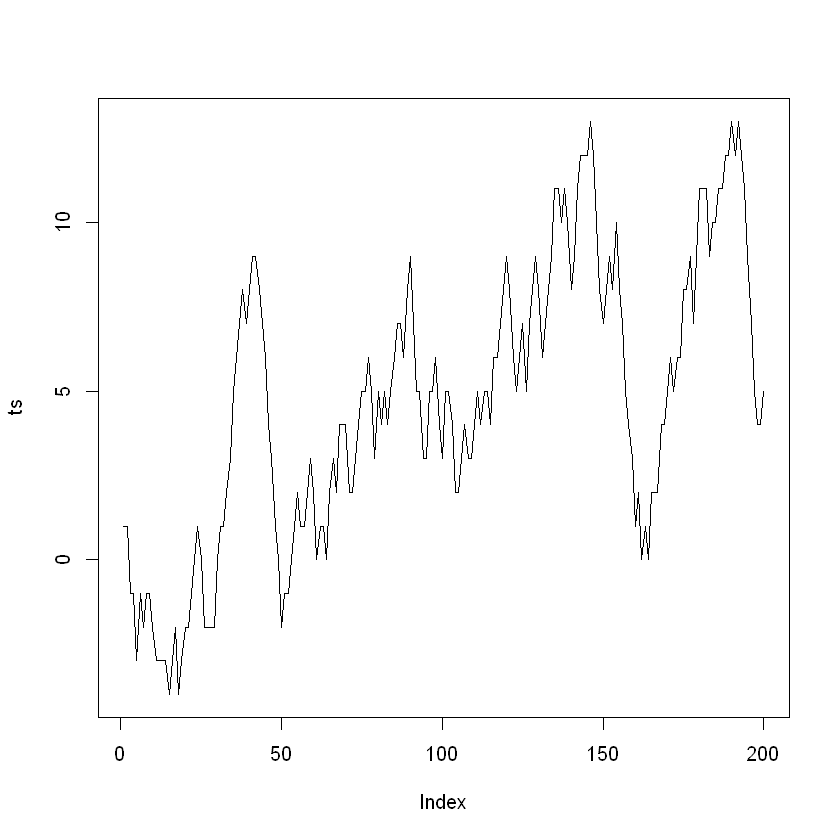

In [147]:
set.seed(1303)
# 난수 time series 생성
steps <- sample(-2:2, size=200, 
                prob=c(.1,.2,.2,.4,.1) ,replace=TRUE)
steps
# 누적합
ts <- cumsum(steps)
plot(ts, type="l")

In [148]:
# 뭐 증가 감소를 나타내는걸 0,1로 표현한듯
difs <- sign(diff(ts)>=0)  # 0 if decreased, 1 otherwise

bits <- paste0(difs,collapse="")  # colapse into a string of bits
bits

[1] "1010101100111011011111100111111111111011100000000111110111001101101110111111001010111101100101111001100111011101101111100011011100111110100111111000011010000001010111111101111101111011111110100000011"

In [149]:
# 00으로 시작되는 부분 index
matches <- gregexpr("00+", bits, perl = T)[[1]]
matches

[1]   9  24  42  59  77  90  98 102 120 129 138 146 154 192
attr(,"match.length")
 [1] 2 2 8 2 2 2 2 2 3 2 2 4 6 6
attr(,"useBytes")
[1] TRUE

In [151]:
# 00으로 시작되는 부분 index에 해당하는 length
attributes(matches)$match.length

[1] 2 2 8 2 2 2 2 2 3 2 2 4 6 6

#### 여러개의 0으로 이어지는 부분 출력해서 0의 개수가 특정 수 이상인 부분 찾을 때 좋을듯

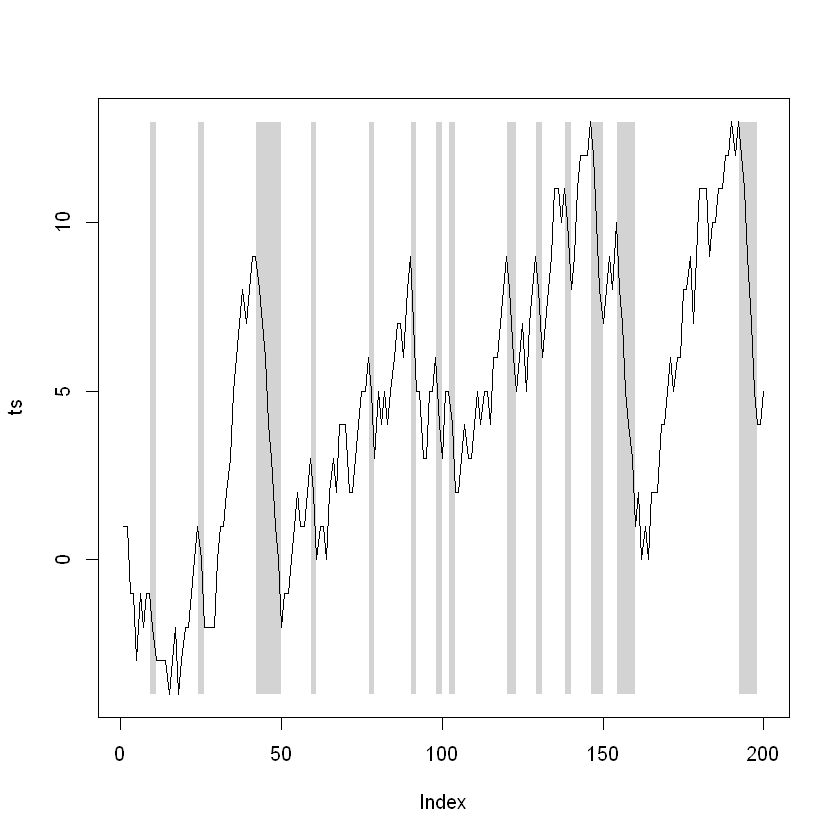

In [154]:
plot(ts, type="n")
min.y <- rep(min(ts),length(matches))
max.y <- rep(max(ts),length(matches))
rect(matches, min.y, matches+attributes(matches)$match.length, max.y, col="lightgrey", border=FALSE)
points(ts, type="l")

In [8]:
library(stringr)

str1 <- c("o mapa")
str2 <- c("nao e o territorio")
str3 <- str_c(str1,str2, sep=" ") # paste와 동일 결과
str3
str4 <- paste(str1, str2)
str4

[1] "o mapa nao e o territorio"

[1] "o mapa nao e o territorio"

In [13]:
# R 내장 letters (소문자 알파벳)
str_c(letters, collapse = ", ") # 소문자
str_c(LETTERS, collapse = ", ") # 대문자


[1] "a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u, v, w, x, y, z"

[1] "A, B, C, D, E, F, G, H, I, J, K, L, M, N, O, P, Q, R, S, T, U, V, W, X, Y, Z"

In [14]:
str_length(str3) # 공백포함

[1] 25

In [20]:
str_dup("ab",5)  # 하나의 vector로 반환
rep("ab", each = 5) # rep는 반복

[1] "ababababab"

[1] "ab" "ab" "ab" "ab" "ab"

In [21]:
str_dup(c("ab","c"),3)

[1] "ababab" "ccc"

In [22]:
str_dup("ab",1:3)

[1] "ab"     "abab"   "ababab"

In [23]:
str3
str_count(str3, "r")  # r의 개수

[1] 3

In [24]:
str_detect(str3, "r")  

[1] TRUE

In [27]:
# [it][eo]+ => ie, io, te, to 4개의 케이스중 
#              가장 먼저 매칭되는 문자를 찾으세요
str3
str_extract(str3, "[it][eo]+") 
str4 <- "ie to istel"
str_extract(str4, "[it][eo]+") 

[1] "o mapa nao e o territorio"

[1] "te"

[1] "ie"

In [28]:
str_extract_all(str3, "[it][eo]+")

[[1]]
[1] "te" "to" "io"

In [29]:
str_locate(str3, "[it][eo]+")  

start,end
16,17


In [32]:
str_locate_all(str3, "[it][eo]+")
test <- str_locate_all(str3, "[it][eo]+")
str(test) # 결과는 list형태

start,end
16,17
21,22
24,25


List of 1
 $ : int [1:3, 1:2] 16 21 24 17 22 25
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:2] "start" "end"


In [33]:
str_replace(str3,"r","R")      # replace first match
str_replace_all(str3,"r","R")  # replace all matches

[1] "o mapa nao e o teRritorio"

[1] "o mapa nao e o teRRitoRio"

In [34]:
str_split(str3,"e") # e를 기준으로 문자를 쪼개라

[[1]]
[1] "o mapa nao " " o t"        "rritorio"

In [35]:
str_split(str3,"e",n=2) 
# argument n(결과로 반환될 개수) 
# 해당 n이 충족되면 종료

[[1]]
[1] "o mapa nao "   " o territorio"

In [36]:
str_sub(str3, 1, 3)  

[1] "o m"

In [37]:
str_sub(str3,
        seq(1,24,2), # 1,3,5,7... 23
        seq(2,25,2)) # 2,4,6,8... 24
# (1,2) / (3,4) ... (23,24) 순서쌍으로 문자가 출력됨

[1] "o " "ma" "pa" " n" "ao" " e" " o" " t" "er" "ri" "to" "ri"

In [39]:
str4 <- "BBCDEF"
# 특정 문자 위치를 찾아서 변환가능
str_sub(str4, 1, 1) <- "A"
str4

[1] "ABCDEF"

In [47]:
strings <- c(" 219 733 8965", "329-293-8753 ", "banana", "595 794 7569",
  "387 287 6718", "apple", "233.398.9187  ", "482 952 3315",
  "239 923 8115", "842 566 4692", "Work: 579-499-7527", "$1000",
  "Home: 543.355.3679")
phone <- "([2-9][0-9]{2})[- .]([0-9]{3})[- .]([0-9]{4})"
str_extract(strings, phone)

# 정규표현식 ()단위로 하나의 결과가 출력되는 듯
# [2-9][5-9]{2} : (2~9)(0~9)의 숫자가 적어도 2번 반복
# [- .] : - / 공백 / . 이 들어가고 
# [0-9]{3}  : 3개의 문자가 0~9사이 숫자
# [0-9]{4}  : 4개의 문자가 0~9사이 숫자

[1] "219 733 8965" "329-293-8753" NA             "595 794 7569" "387 287 6718"
 [6] NA             "233.398.9187" "482 952 3315" "239 923 8115" "842 566 4692"
[11] "579-499-7527" NA             "543.355.3679"

In [48]:
str_match(strings, phone)

219 733 8965,219,733,8965
329-293-8753,329,293,8753
NA,NA,NA,NA
595 794 7569,595,794,7569
387 287 6718,387,287,6718
NA,NA,NA,NA
233.398.9187,233,398,9187
482 952 3315,482,952,3315
239 923 8115,239,923,8115
842 566 4692,842,566,4692
579-499-7527,579,499,7527


In [51]:
s1 <- str_pad("hadley", 10, "left")
s2 <- str_pad("hadley", 10, "right")
s3 <- str_pad("hadley", 10, "both")
s1; s2; s3
# str_pad 공백 문자 입력 ("문자", 공백 수, 공백 위치)

[1] "    hadley"

[1] "hadley    "

[1] "  hadley  "

In [61]:
thanks_path <- file.path(R.home("doc"), "THANKS")
thanks_path

thanks <- str_c(readLines(thanks_path), collapse = "\n")
# 문자열을 한 line씩 읽어오되 \n로 구분해줌
thanks <- word(thanks, 1, 3, fixed("\n\n"))
# extract word index 1~3인 것 같은데?
cat(str_wrap(thanks), "\n")

[1] "C:/R/R-34~1.1/doc/THANKS"

R would not be what it is today without the invaluable help of these people
outside of the R core team, who contributed by donating code, bug fixes and
documentation: Valerio Aimale, Thomas Baier, Henrik Bengtsson, Roger Bivand,
Ben Bolker, David Brahm, G"oran Brostr"om, Patrick Burns, Vince Carey, Saikat
DebRoy, Matt Dowle, Brian D'Urso, Lyndon Drake, Dirk Eddelbuettel, Claus
Ekstrom, Sebastian Fischmeister, John Fox, Paul Gilbert, Yu Gong, Gabor
Grothendieck, Frank E Harrell Jr, Torsten Hothorn, Robert King, Kjetil Kjernsmo,
Roger Koenker, Philippe Lambert, Jan de Leeuw, Jim Lindsey, Patrick Lindsey,
Catherine Loader, Gordon Maclean, John Maindonald, David Meyer, Ei-ji Nakama,
Jens Oehlschaegel, Steve Oncley, Richard O'Keefe, Hubert Palme, Roger D. Peng,
Jose' C. Pinheiro, Tony Plate, Anthony Rossini, Jonathan Rougier, Petr Savicky,
Guenther Sawitzki, Marc Schwartz, Arun Srinivasan, Detlef Steuer, Bill Simpson,
Gordon Smyth, Adrian Trapletti, Terry Therneau, Rolf Turner, Bill Venable

In [64]:
cat(str_wrap(thanks, width = 40), "\n")
# width 제한

R would not be what it is today
without the invaluable help of these
people outside of the R core team,
who contributed by donating code,
bug fixes and documentation: Valerio
Aimale, Thomas Baier, Henrik Bengtsson,
Roger Bivand, Ben Bolker, David Brahm,
G"oran Brostr"om, Patrick Burns, Vince
Carey, Saikat DebRoy, Matt Dowle,
Brian D'Urso, Lyndon Drake, Dirk
Eddelbuettel, Claus Ekstrom, Sebastian
Fischmeister, John Fox, Paul Gilbert,
Yu Gong, Gabor Grothendieck, Frank E
Harrell Jr, Torsten Hothorn, Robert
King, Kjetil Kjernsmo, Roger Koenker,
Philippe Lambert, Jan de Leeuw, Jim
Lindsey, Patrick Lindsey, Catherine
Loader, Gordon Maclean, John Maindonald,
David Meyer, Ei-ji Nakama, Jens
Oehlschaegel, Steve Oncley, Richard
O'Keefe, Hubert Palme, Roger D. Peng,
Jose' C. Pinheiro, Tony Plate, Anthony
Rossini, Jonathan Rougier, Petr Savicky,
Guenther Sawitzki, Marc Schwartz, Arun
Srinivasan, Detlef Steuer, Bill Simpson,
Gordon Smyth, Adrian Trapletti, Terry
Therneau, Rolf Turner, Bill Venable

In [69]:
cat(str_wrap(thanks, width = 40, indent =2), "\n")
# indent = 첫 문장 들여쓰기 <-> 내어쓰기(exdent)

  R would not be what it is today
without the invaluable help of these
people outside of the R core team,
who contributed by donating code,
bug fixes and documentation: Valerio
Aimale, Thomas Baier, Henrik Bengtsson,
Roger Bivand, Ben Bolker, David Brahm,
G"oran Brostr"om, Patrick Burns, Vince
Carey, Saikat DebRoy, Matt Dowle,
Brian D'Urso, Lyndon Drake, Dirk
Eddelbuettel, Claus Ekstrom, Sebastian
Fischmeister, John Fox, Paul Gilbert,
Yu Gong, Gabor Grothendieck, Frank E
Harrell Jr, Torsten Hothorn, Robert
King, Kjetil Kjernsmo, Roger Koenker,
Philippe Lambert, Jan de Leeuw, Jim
Lindsey, Patrick Lindsey, Catherine
Loader, Gordon Maclean, John Maindonald,
David Meyer, Ei-ji Nakama, Jens
Oehlschaegel, Steve Oncley, Richard
O'Keefe, Hubert Palme, Roger D. Peng,
Jose' C. Pinheiro, Tony Plate, Anthony
Rossini, Jonathan Rougier, Petr Savicky,
Guenther Sawitzki, Marc Schwartz, Arun
Srinivasan, Detlef Steuer, Bill Simpson,
Gordon Smyth, Adrian Trapletti, Terry
Therneau, Rolf Turner, Bill Venab

In [70]:
sentences <- c("Jane saw a cat", "Jane sat down")
word(sentences, 1)  
word(sentences, 2)
word(sentences, -1)
word(sentences, 2, -1)
word(sentences[1], 1:3, -1)  

[1] "Jane" "Jane"

[1] "saw" "sat"

[1] "cat"  "down"

[1] "saw a cat" "sat down"

[1] "Jane saw a cat" "saw a cat"      "a cat"

In [73]:
str <- 'abc.def..123.4568.999'
word(str, 1, sep = fixed('..'))
word(str, 2, sep = fixed('..'))

[1] "abc.def"

[1] "123.4568.999"